In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/george/ANKUR/ML_Script/tcga_553_LUSC.csv')
df

,Unnamed: 0,TSPAN6,DPM1,FGR,CFH,FUCA2,GCLC,NFYA,ENPP4,SEMA3F,...,LOC122513141,LOC124905143,LOC105373436,LOC102723663,CERNA2,LCAL1,LOC124900869,LOC107984132,NPBWR1,label
0,TCGA-60-2698-01A-01R-0851-07,53.1869,82.4269,34.3376,23.4241,89.0748,55.3270,28.4356,23.7656,83.8257,...,35.9572,0.1005,0.0000,19.7567,11.2642,0.9543,0.0000,1.0111,10.3937,Diseased
1,TCGA-33-4589-01A-01R-1443-07,22.4227,224.2751,4.7040,20.1337,60.0927,16.5114,7.3151,2.0576,14.5741,...,12.4038,0.0000,0.0000,2.7090,39.8973,2.2010,0.0000,0.0000,1.7904,Diseased
2,TCGA-18-3410-01A-01R-0980-07,30.6229,106.4014,19.1849,8.7262,28.6914,15.5879,52.2269,36.0240,88.5447,...,30.8764,0.0000,0.0000,20.8358,6.0468,109.9411,1.0754,7.3334,0.0434,Diseased
3,TCGA-60-2715-01A-01R-0851-07,24.4795,70.7812,47.3071,34.8900,38.2802,53.2315,29.3218,13.6934,46.9047,...,26.6158,0.0201,0.0000,12.6149,3.7676,7.7544,0.4154,1.1830,3.4109,Diseased
4,TCGA-22-5471-01A-01R-1635-07,59.4403,106.9143,13.0712,10.7765,54.4352,62.8754,21.5217,6.1690,54.6061,...,29.7088,0.0215,0.0000,8.3077,26.8405,9.7497,0.4000,0.0666,3.0145,Diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,TCGA-56-7221-01A-11R-2045-07,60.9681,126.3083,7.2928,12.1974,34.9278,212.3142,29.7037,5.4975,47.8198,...,32.8442,0.0000,0.0204,4.9693,27.0525,12.2034,0.5633,68.0840,6.2174,Diseased
549,TCGA-77-8138-01A-11R-2247-07,65.9006,85.1579,14.4276,108.3618,94.5701,34.5745,33.4104,3.7303,125.6958,...,27.9654,0.0000,0.0000,7.2181,3.8003,0.0856,0.0000,0.0000,26.5927,Diseased
550,TCGA-43-7657-01A-31R-2125-07,29.4812,120.4973,7.3004,8.9725,75.6691,94.2556,28.1592,8.0366,80.0951,...,34.9319,0.0491,11.1504,8.9572,103.5304,0.6510,0.0000,10.2532,150.4413,Diseased
551,TCGA-21-A5DI-01A-31R-A26W-07,44.3728,210.0000,5.4134,45.2864,36.0647,56.1448,41.8038,0.8080,85.6041,...,15.4199,0.0000,0.0000,4.3212,51.7602,1.1882,0.0000,0.0000,6.2139,Diseased


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df

,TSPAN6,DPM1,FGR,CFH,FUCA2,GCLC,NFYA,ENPP4,SEMA3F,CFTR,...,LOC122513141,LOC124905143,LOC105373436,LOC102723663,CERNA2,LCAL1,LOC124900869,LOC107984132,NPBWR1,label
0,53.1869,82.4269,34.3376,23.4241,89.0748,55.3270,28.4356,23.7656,83.8257,5.3583,...,35.9572,0.1005,0.0000,19.7567,11.2642,0.9543,0.0000,1.0111,10.3937,Diseased
1,22.4227,224.2751,4.7040,20.1337,60.0927,16.5114,7.3151,2.0576,14.5741,0.0198,...,12.4038,0.0000,0.0000,2.7090,39.8973,2.2010,0.0000,0.0000,1.7904,Diseased
2,30.6229,106.4014,19.1849,8.7262,28.6914,15.5879,52.2269,36.0240,88.5447,0.2635,...,30.8764,0.0000,0.0000,20.8358,6.0468,109.9411,1.0754,7.3334,0.0434,Diseased
3,24.4795,70.7812,47.3071,34.8900,38.2802,53.2315,29.3218,13.6934,46.9047,4.6777,...,26.6158,0.0201,0.0000,12.6149,3.7676,7.7544,0.4154,1.1830,3.4109,Diseased
4,59.4403,106.9143,13.0712,10.7765,54.4352,62.8754,21.5217,6.1690,54.6061,0.5368,...,29.7088,0.0215,0.0000,8.3077,26.8405,9.7497,0.4000,0.0666,3.0145,Diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,60.9681,126.3083,7.2928,12.1974,34.9278,212.3142,29.7037,5.4975,47.8198,2.1552,...,32.8442,0.0000,0.0204,4.9693,27.0525,12.2034,0.5633,68.0840,6.2174,Diseased
549,65.9006,85.1579,14.4276,108.3618,94.5701,34.5745,33.4104,3.7303,125.6958,2.5362,...,27.9654,0.0000,0.0000,7.2181,3.8003,0.0856,0.0000,0.0000,26.5927,Diseased
550,29.4812,120.4973,7.3004,8.9725,75.6691,94.2556,28.1592,8.0366,80.0951,0.0520,...,34.9319,0.0491,11.1504,8.9572,103.5304,0.6510,0.0000,10.2532,150.4413,Diseased
551,44.3728,210.0000,5.4134,45.2864,36.0647,56.1448,41.8038,0.8080,85.6041,0.6176,...,15.4199,0.0000,0.0000,4.3212,51.7602,1.1882,0.0000,0.0000,6.2139,Diseased


In [4]:
X = df.drop(columns=['label'])  
y = df['label']

In [5]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [6]:
unique, counts= np.unique(y, return_counts=True)
dict(zip(unique,counts))

{0: 51, 1: 502}

<Axes: title={'center': 'Sample Distribution (LUSC)'}, xlabel='Control (0) vs Diseased (1)', ylabel='Number of Samples'>

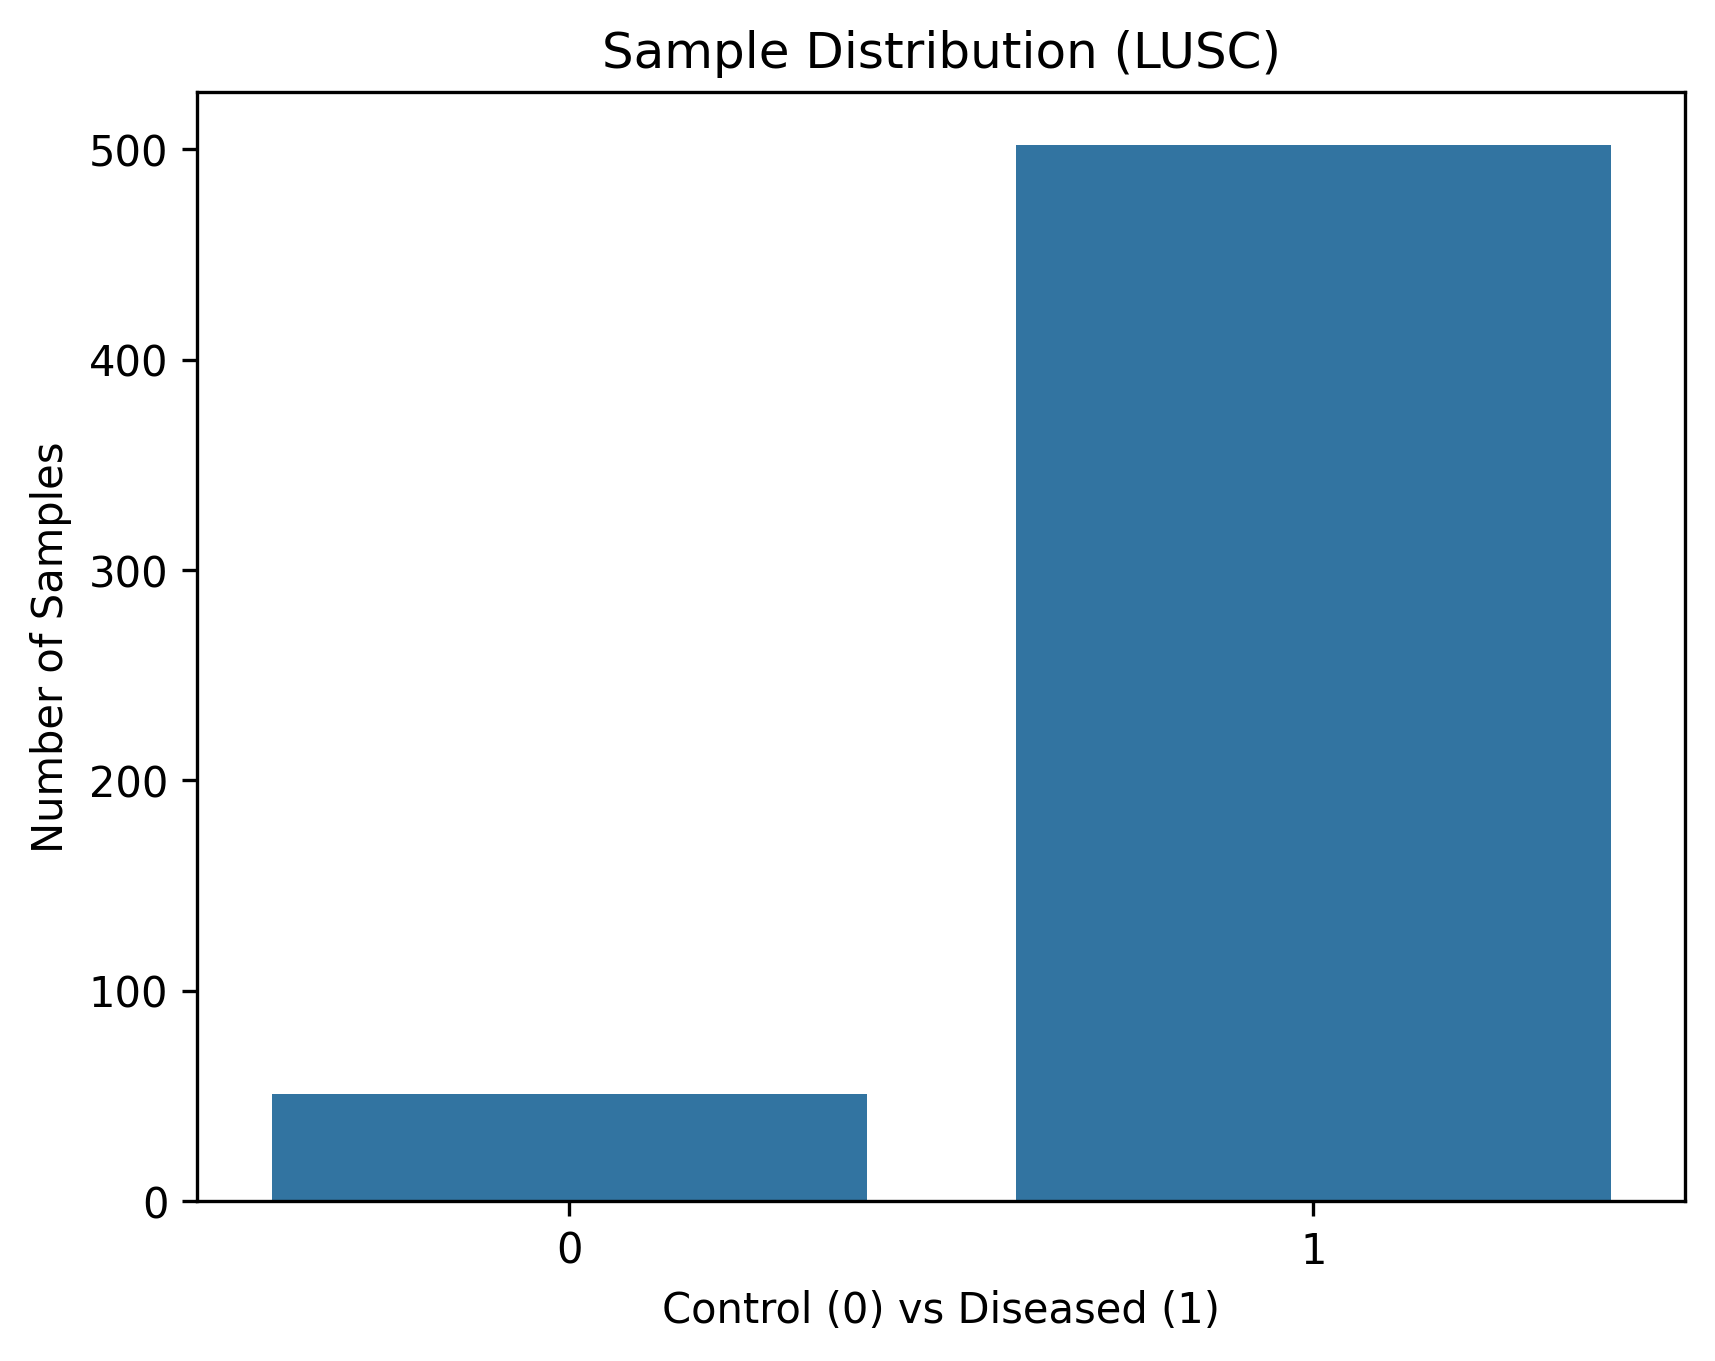

In [7]:
plt.figure(dpi=300)
plt.title("Sample Distribution (LUSC)")
plt.xlabel("Control (0) vs Diseased (1)")
plt.ylabel("Number of Samples")
sns.countplot(x=y)

In [8]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Performing LASSO feature selection

In [10]:
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

lasso_cv = LassoCV(alphas=alphas, max_iter=100000)  

lasso_cv.fit(X_train,y_train)

best_alpha = lasso_cv.alpha_
best_lasso_coefficients = lasso_cv.coef_

y_pred_lasso = lasso_cv.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Best Alpha:", best_alpha)
print("Best Coefficients:", best_lasso_coefficients)
print("Mean Squared Error:", mse_lasso)

Best Alpha: 0.01
Best Coefficients: [ 0.  0. -0. ... -0.  0.  0.]
Mean Squared Error: 0.010230694582209366


<Figure size 1000x600 with 0 Axes>

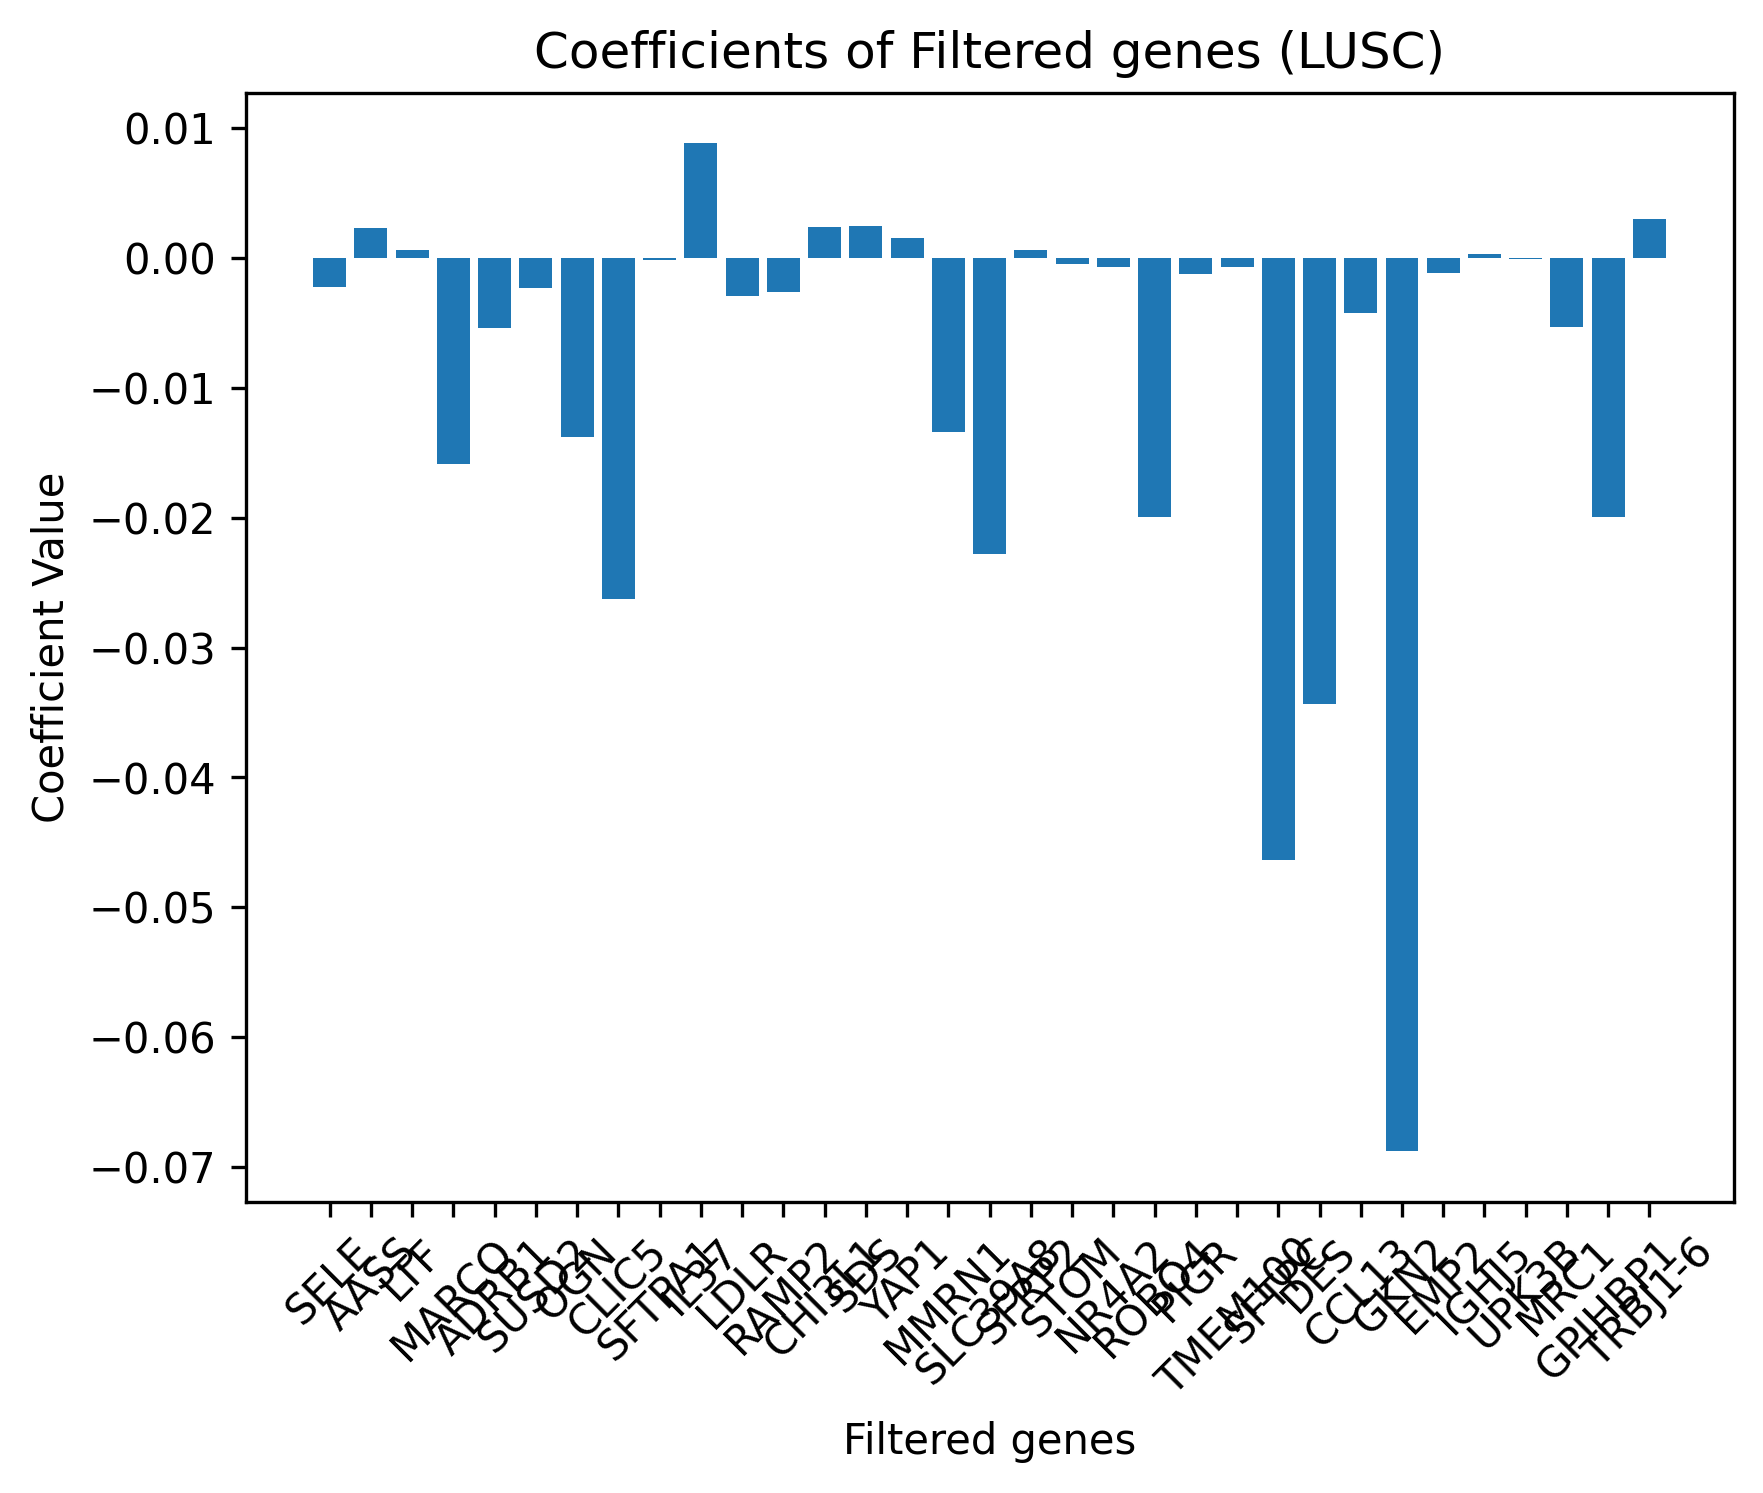

Gene_symbol: SELE, Coefficient: -0.002244163564538335
Gene_symbol: AASS, Coefficient: 0.002317837339421463
Gene_symbol: LTF, Coefficient: 0.0006391546610491256
Gene_symbol: MARCO, Coefficient: -0.0158350723440935
Gene_symbol: ADRB1, Coefficient: -0.005394852509583928
Gene_symbol: SUSD2, Coefficient: -0.0023201159612146844
Gene_symbol: OGN, Coefficient: -0.013809874702590966
Gene_symbol: CLIC5, Coefficient: -0.026238549549121002
Gene_symbol: SFTPA1, Coefficient: -0.000181217050812792
Gene_symbol: IL37, Coefficient: 0.008834596579322581
Gene_symbol: LDLR, Coefficient: -0.0029534319481082033
Gene_symbol: RAMP2, Coefficient: -0.00263123857617015
Gene_symbol: CHI3L1, Coefficient: 0.0024126410619936902
Gene_symbol: SDS, Coefficient: 0.0024849048879640196
Gene_symbol: YAP1, Coefficient: 0.0015800536846012495
Gene_symbol: MMRN1, Coefficient: -0.013405562462977432
Gene_symbol: SLC39A8, Coefficient: -0.022790375453722485
Gene_symbol: SFRP2, Coefficient: 0.0006278922569840191
Gene_symbol: STOM, C

In [11]:
filtered_genes_lasso = X.columns[best_lasso_coefficients != 0]
filtered_coeffs_lasso = best_lasso_coefficients[best_lasso_coefficients != 0]
lasso_genes_list = []


plt.figure(figsize=(10, 6))
plt.figure(dpi=300)
plt.bar(filtered_genes_lasso, filtered_coeffs_lasso)
plt.xticks(rotation=45)
plt.xlabel("Filtered genes")
plt.ylabel("Coefficient Value")
plt.title("Coefficients of Filtered genes (LUSC)")
plt.show()

total_genes_selected=0
for gene, coef in zip(filtered_genes_lasso, filtered_coeffs_lasso):
    total_genes_selected+=1
    lasso_genes_list.append(gene)
    print(f"Gene_symbol: {gene}, Coefficient: {coef}")


with open("/home/george/lasso_genes_LUSC.txt", "w") as file:
    for gene in lasso_genes_list:
        file.write(gene + "\n")

print()
print("The total number of genes selected is: ", total_genes_selected)

Building the networkx model, using the lasso genes

In [12]:
import networkx as net

In [13]:
with open("/home/george/lasso_genes_LUSC.txt", "r") as file:
    selected_genes = [line.strip() for line in file]

filtered_df = df[selected_genes + ['label']]
filtered_df

,SELE,AASS,LTF,MARCO,ADRB1,SUSD2,OGN,CLIC5,SFTPA1,IL37,...,DES,CCL13,GKN2,EMP2,IGHJ5,UPK3B,MRC1,GPIHBP1,TRBJ1-6,label
0,14.6551,7.2794,494.2487,185.4782,2.1864,29.0329,1.3164,9.6722,3885.9699,0.4205,...,9.7561,27.6495,14.3269,114.7113,12.0000,22.4742,57.8591,5.3146,7.7660,Diseased
1,0.8055,0.2883,1.0248,17.7210,0.6321,0.1269,0.0000,0.2550,0.7636,0.0000,...,0.1402,42.7307,0.0000,23.0501,2.0104,9.4897,13.4907,0.0000,0.0000,Diseased
2,14.0817,12.5248,37.7545,141.0997,0.2406,25.1564,0.5910,1.4191,198.6784,0.0000,...,5.7975,0.8883,1.2370,77.6330,38.5434,29.8677,4.6385,0.6208,13.7940,Diseased
3,15.8578,30.5845,203.5276,282.4455,10.7337,104.1855,10.7723,26.7027,7593.8246,0.1683,...,35.5469,38.2054,12.9922,132.0443,44.1886,56.0476,69.4988,23.6499,20.4268,Diseased
4,7.7072,3.9062,35.3039,17.0253,0.5799,3.2921,0.5135,1.1632,5.5875,0.3001,...,1.6585,34.7491,0.0000,72.6901,13.3580,33.1670,8.7927,0.3569,1.9000,Diseased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,0.2684,10.2140,134.2224,15.7889,0.8101,5.5464,1.9053,0.8391,772.4692,0.2174,...,6.4520,1.9388,0.6653,142.2090,0.9304,29.7653,2.2233,0.5656,0.8602,Diseased
549,1.9097,10.0949,276.9497,17.2669,5.6687,39.6063,1.6998,0.8119,869.0762,0.4588,...,2.6223,9.3552,0.3053,64.9506,13.7487,147.3271,10.8151,1.7056,3.6317,Diseased
550,0.0125,7.2548,0.2303,30.2971,2.3617,8.6008,5.9989,0.1761,1.0308,0.0684,...,1.7746,4.0465,0.1093,57.9557,9.3744,0.4703,3.3867,1.7554,2.1667,Diseased
551,0.0992,17.3712,13.6834,3.4459,2.0954,2.0278,0.1131,0.0545,1.4383,1.8975,...,2.2660,5.6650,0.0000,35.9071,0.0000,19.6916,2.1042,0.5542,8.5822,Diseased


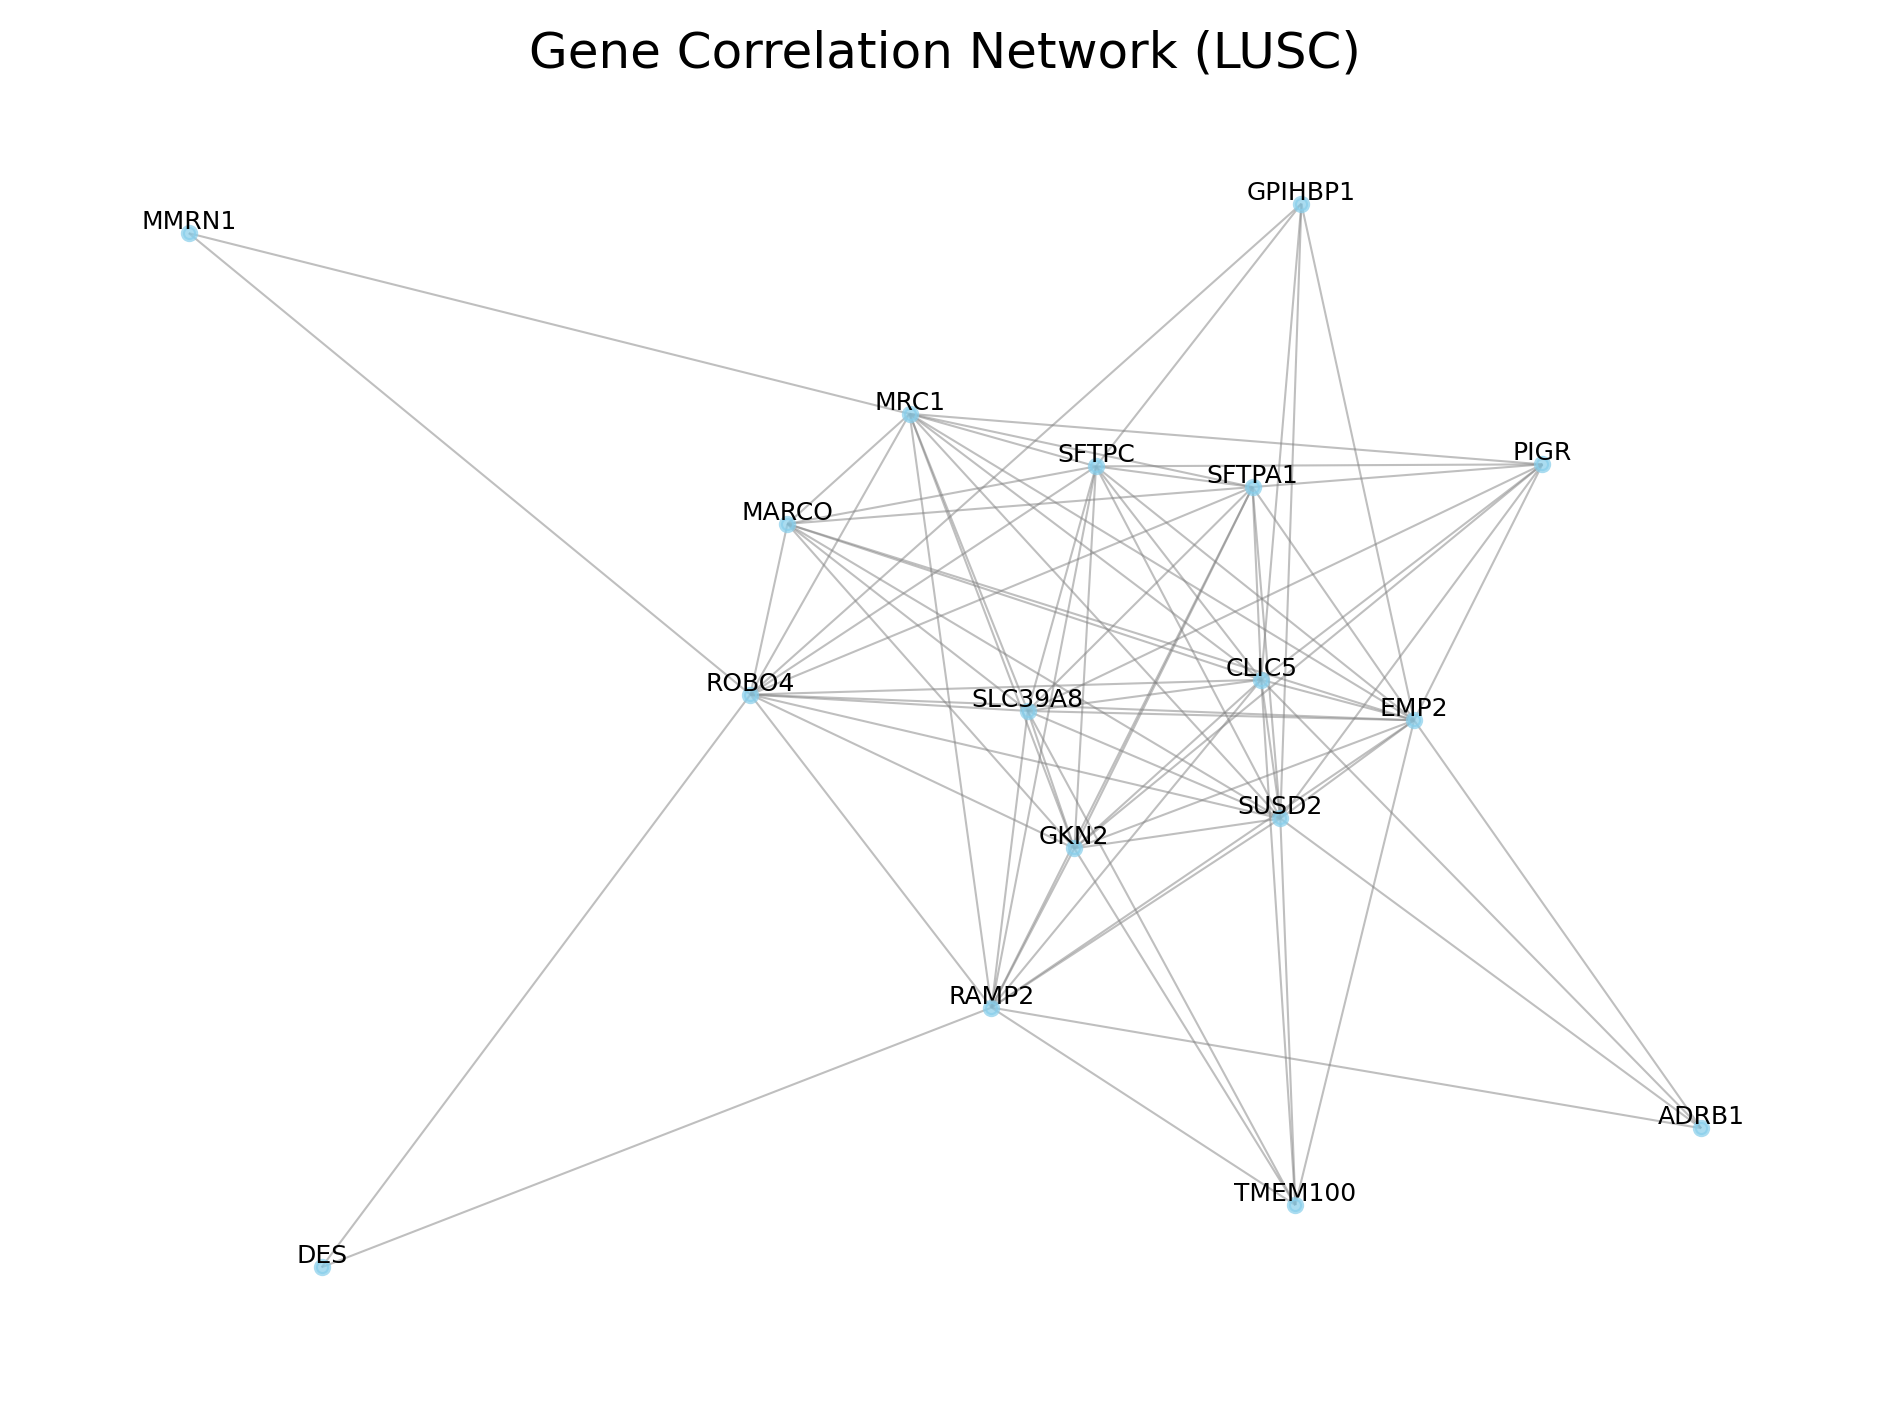

In [14]:
plt.figure(dpi=300)
G= net.Graph()
X_filtered = filtered_df.drop(columns=['label'])
labels = filtered_df['label']
gene_correlation_matrix = X_filtered.corr()
threshold = 0.7

genes = X_filtered.columns
for gene in genes:
    G.add_node(gene, label='Gene')

for gene1 in genes:
    for gene2 in genes:
        if gene1 != gene2 and abs(gene_correlation_matrix[gene1][gene2]) > threshold:
            G.add_edge(gene1, gene2, weight=gene_correlation_matrix[gene1][gene2])

filtered_genes = [node for node in G.nodes if G.degree[node] > 0]

filtered_G = G.subgraph(filtered_genes)

pos = net.spring_layout(filtered_G, k=0.8)  

node_labels = {gene: gene for gene in filtered_genes}

net.draw_networkx_nodes(filtered_G, pos, node_size=10, node_color='skyblue', alpha=0.7)
net.draw_networkx_labels(filtered_G, pos, labels=node_labels, font_size=6, font_color='black', verticalalignment='bottom')

edges = filtered_G.edges()
net.draw_networkx_edges(filtered_G, pos, edgelist=edges, edge_color='gray', width=0.5, alpha=0.5)


plt.title('Gene Correlation Network (LUSC)')
plt.axis('off')  
plt.tight_layout()
plt.show()

XGBoost

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import shap

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import xgboost as xgb


In [20]:
k=3
random_state = 42
xgbm = xgb.XGBClassifier()
kf = KFold(n_splits=k, random_state=random_state, shuffle=True)
cv_scores = cross_val_score(xgbm, X_filtered, y, cv=kf)
mean_cv_score = np.mean(cv_scores)
print("Cross-validation Scores:", cv_scores)
print("Accuracy:", mean_cv_score )

Cross-validation Scores: [0.96756757 0.98369565 1.        ]
Accuracy: 0.9837544065804935


Confusion Matrix:
[[ 44   7]
 [  2 500]]


<Axes: title={'center': 'LUSC Confusion Matrix (K = 3)'}>

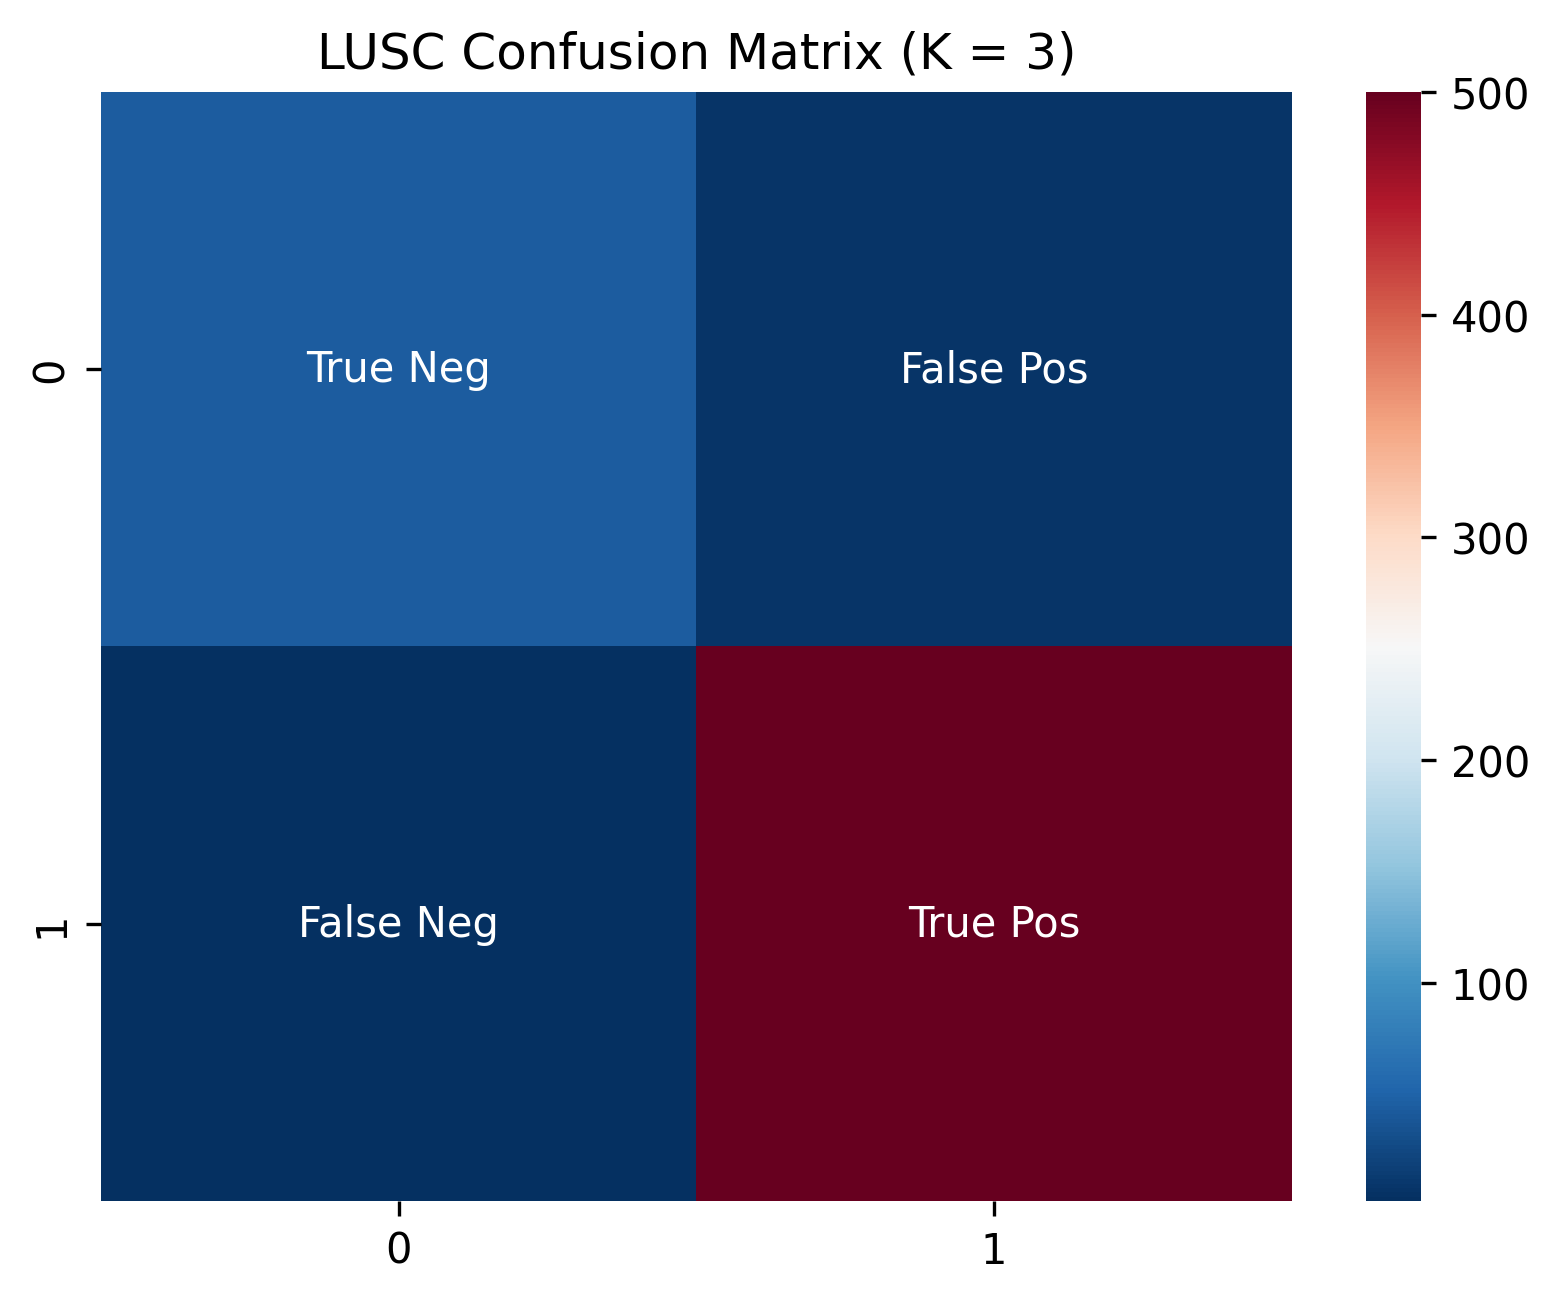

In [18]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix

k = 3
random_state = 42
xgbm = xgb.XGBClassifier()
kf = KFold(n_splits=k, random_state=random_state, shuffle=True)

# Perform cross-validation and get predicted labels
predicted = cross_val_predict(xgbm, X_filtered, y, cv=kf)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, predicted)

print("Confusion Matrix:")
print(conf_matrix)
plt.figure(dpi=300)
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
plt.title("LUSC Confusion Matrix (K = 3)")
sns.heatmap(conf_matrix, annot=labels, fmt="", cmap='RdBu_r')



In [16]:

k=5
random_state = 42
xgbm = xgb.XGBClassifier()
kf = KFold(n_splits=k, random_state=random_state, shuffle=True)
cv_scores = cross_val_score(xgbm, X_filtered, y, cv=kf)
mean_cv_score = np.mean(cv_scores)
print("Cross-validation Scores:", cv_scores)
print("Accuracy:", mean_cv_score )

Cross-validation Scores: [0.99099099 0.99099099 0.98198198 0.99090909 1.        ]
Accuracy: 0.9909746109746109


<Figure size 640x480 with 0 Axes>

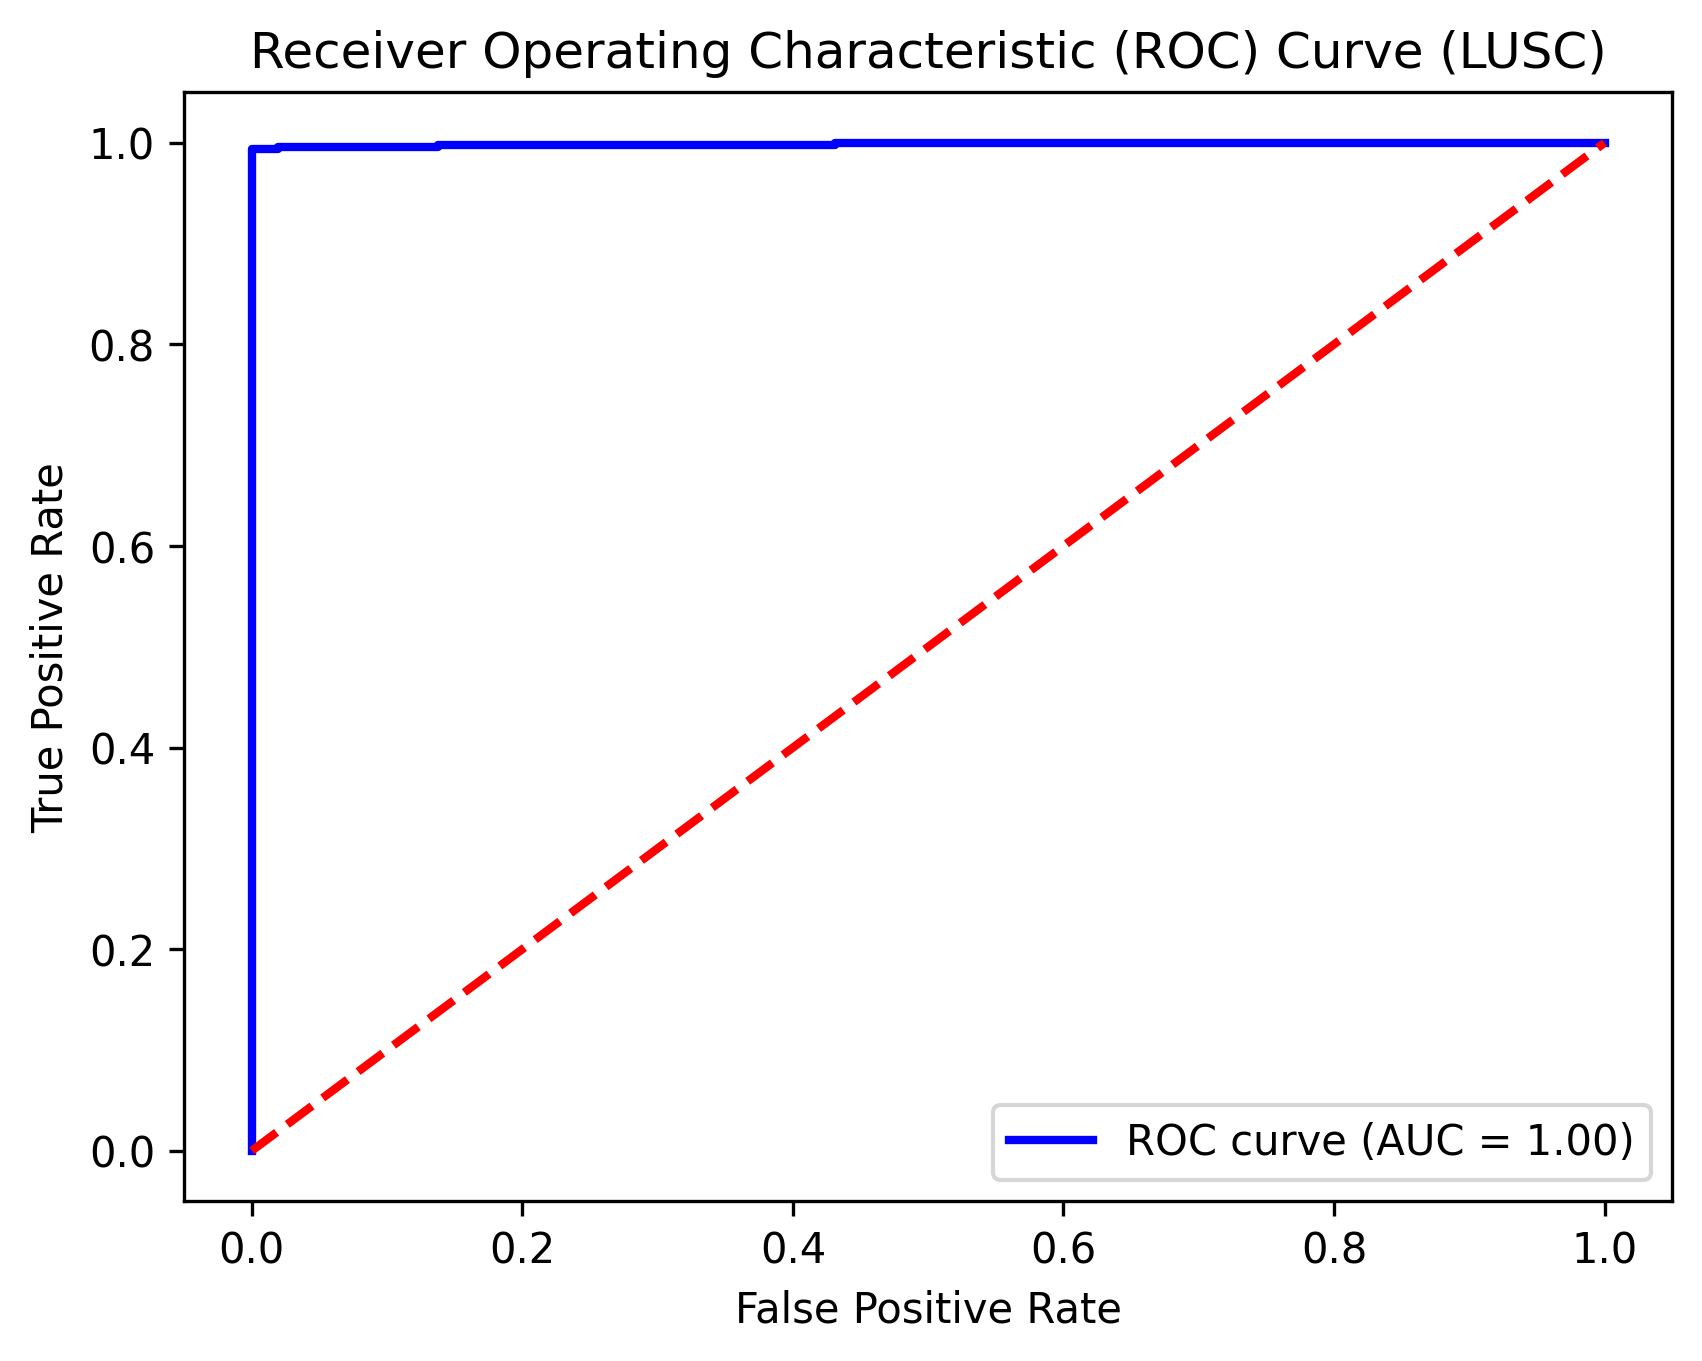

In [18]:

pred_prob = cross_val_predict(xgbm, X_filtered, y, cv=kf, method='predict_proba')
fpr, tpr, thresholds = roc_curve(y, pred_prob[:, 1])
auc = roc_auc_score(y, pred_prob[:, 1])

plt.figure()
plt.figure(dpi=300)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (LUSC)')
plt.legend(loc="lower right")
plt.show()

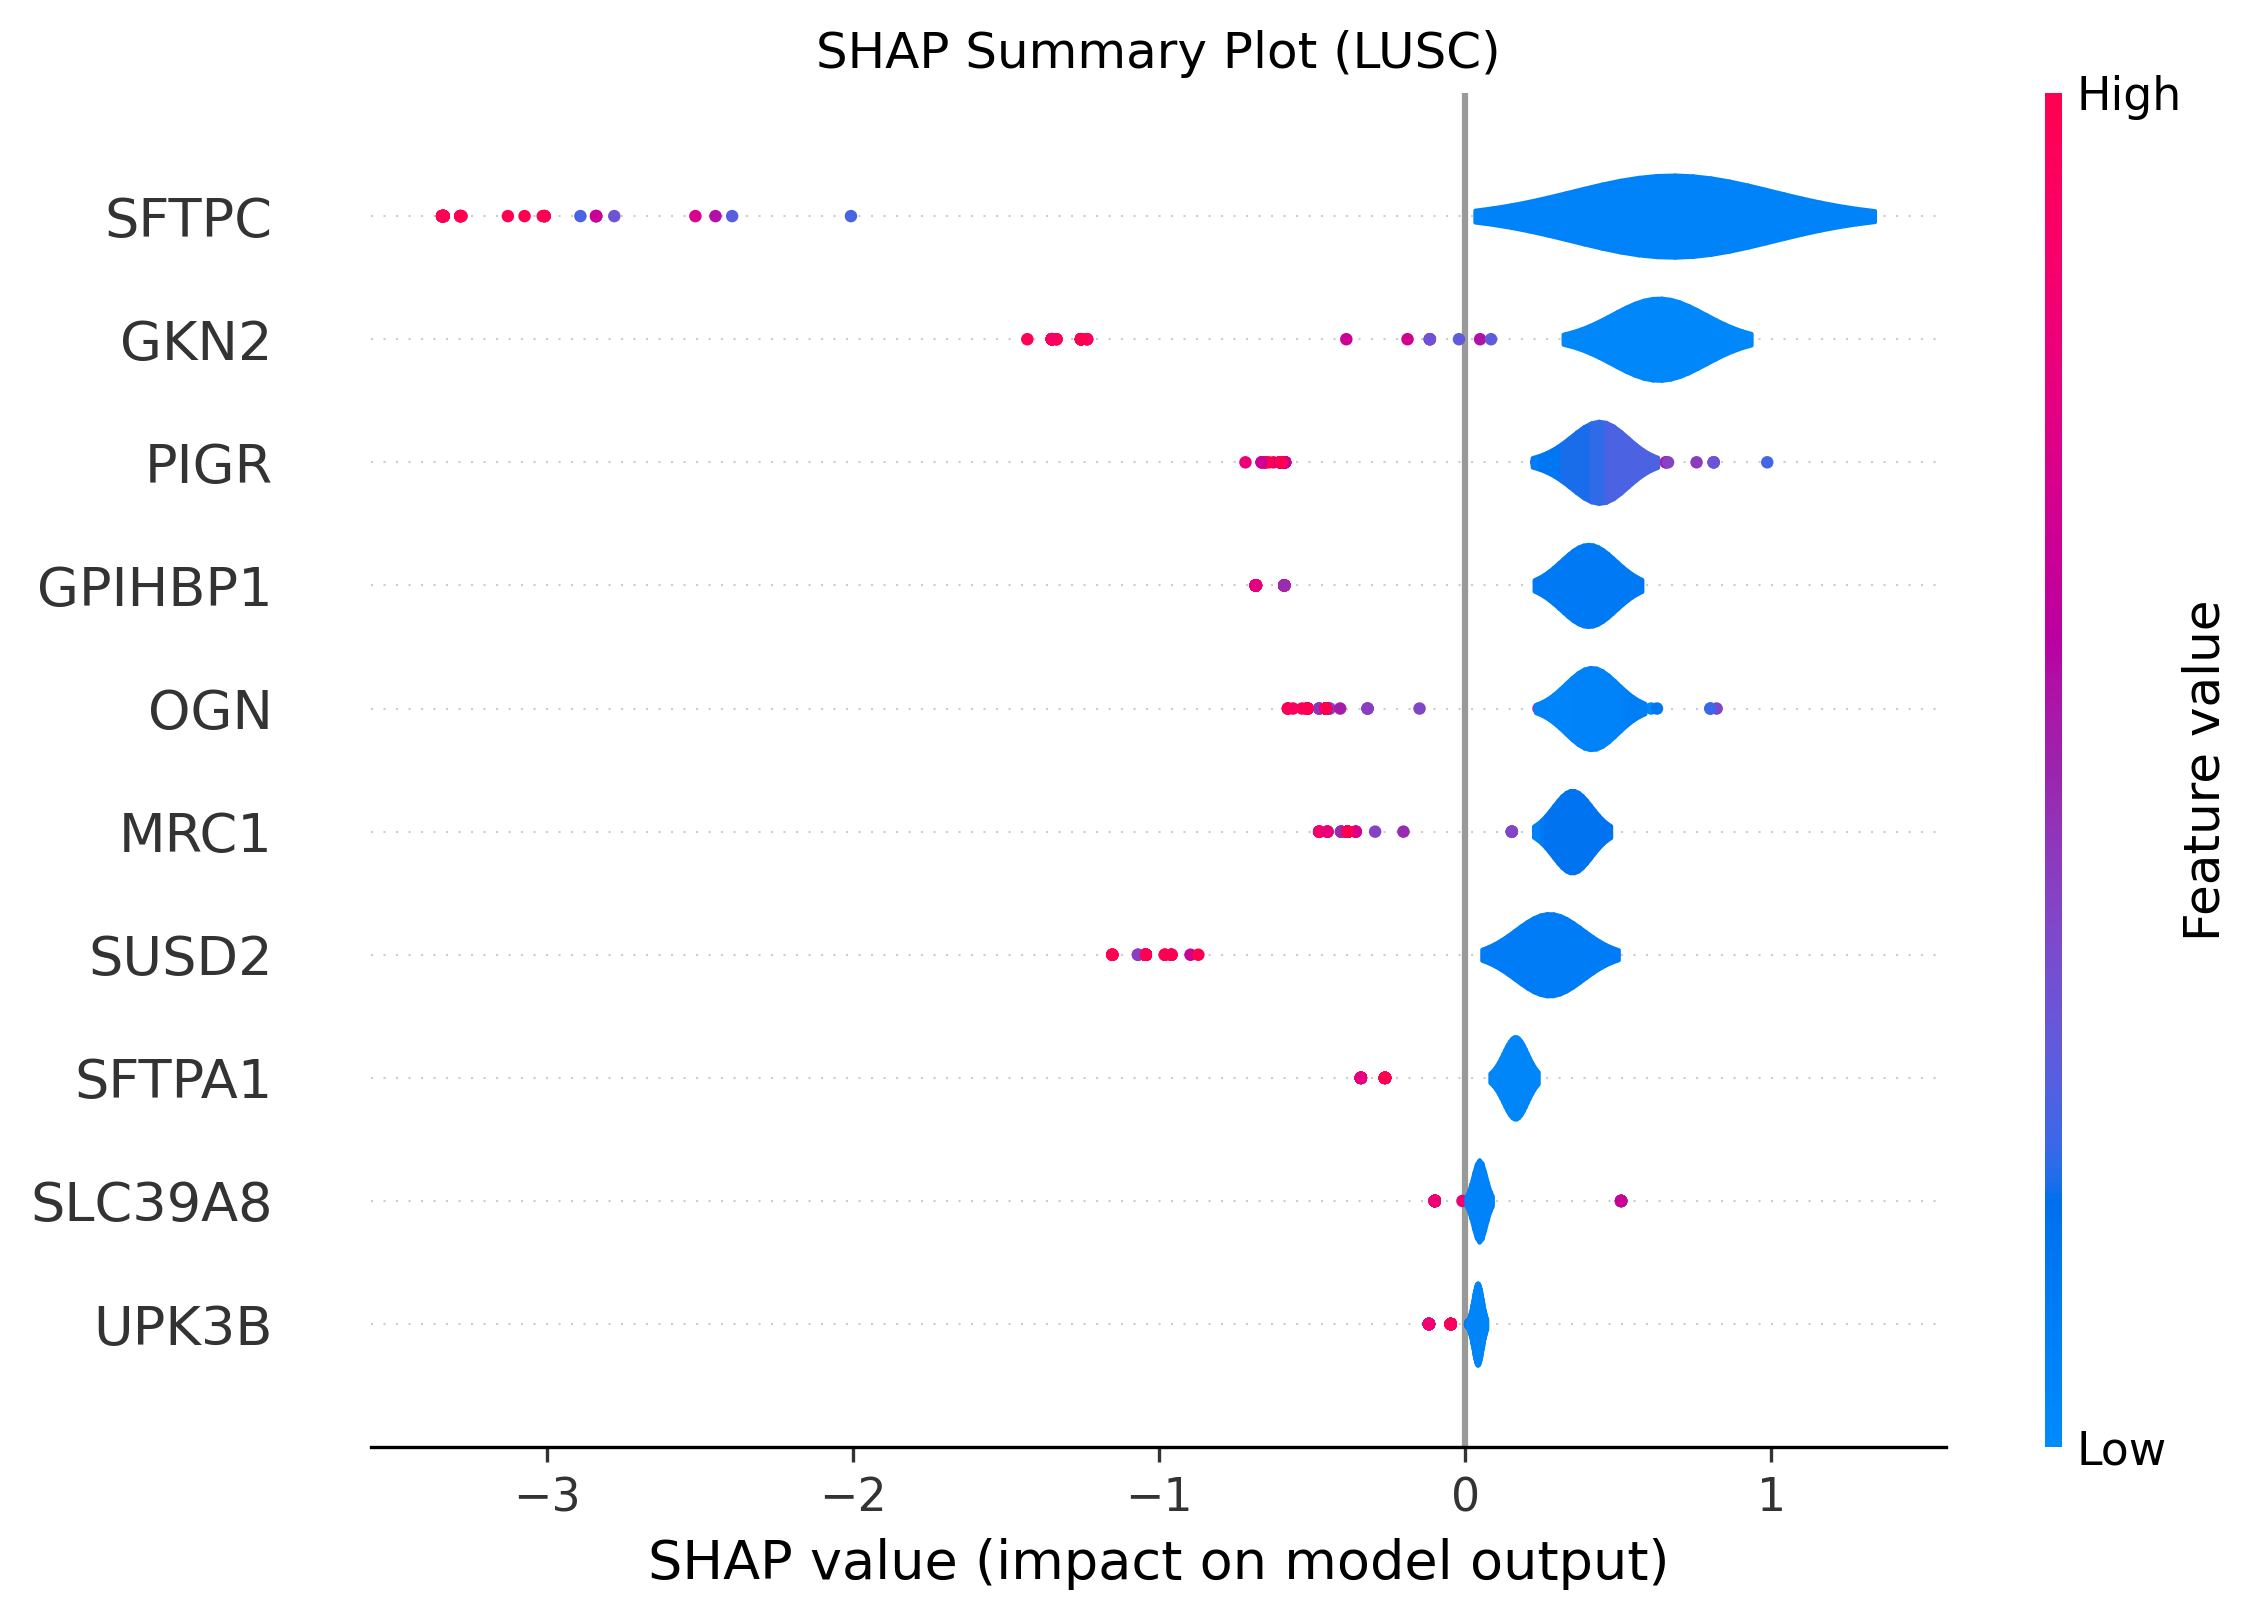

In [19]:
xgbm.fit(X_filtered, y)
plt.figure(dpi=300)
plt.title("SHAP Summary Plot (LUSC)")
explainer = shap.Explainer(xgbm)
shap_values = explainer.shap_values(X_filtered)
shap.summary_plot(shap_values, X_filtered, max_display=10, plot_type="violin")

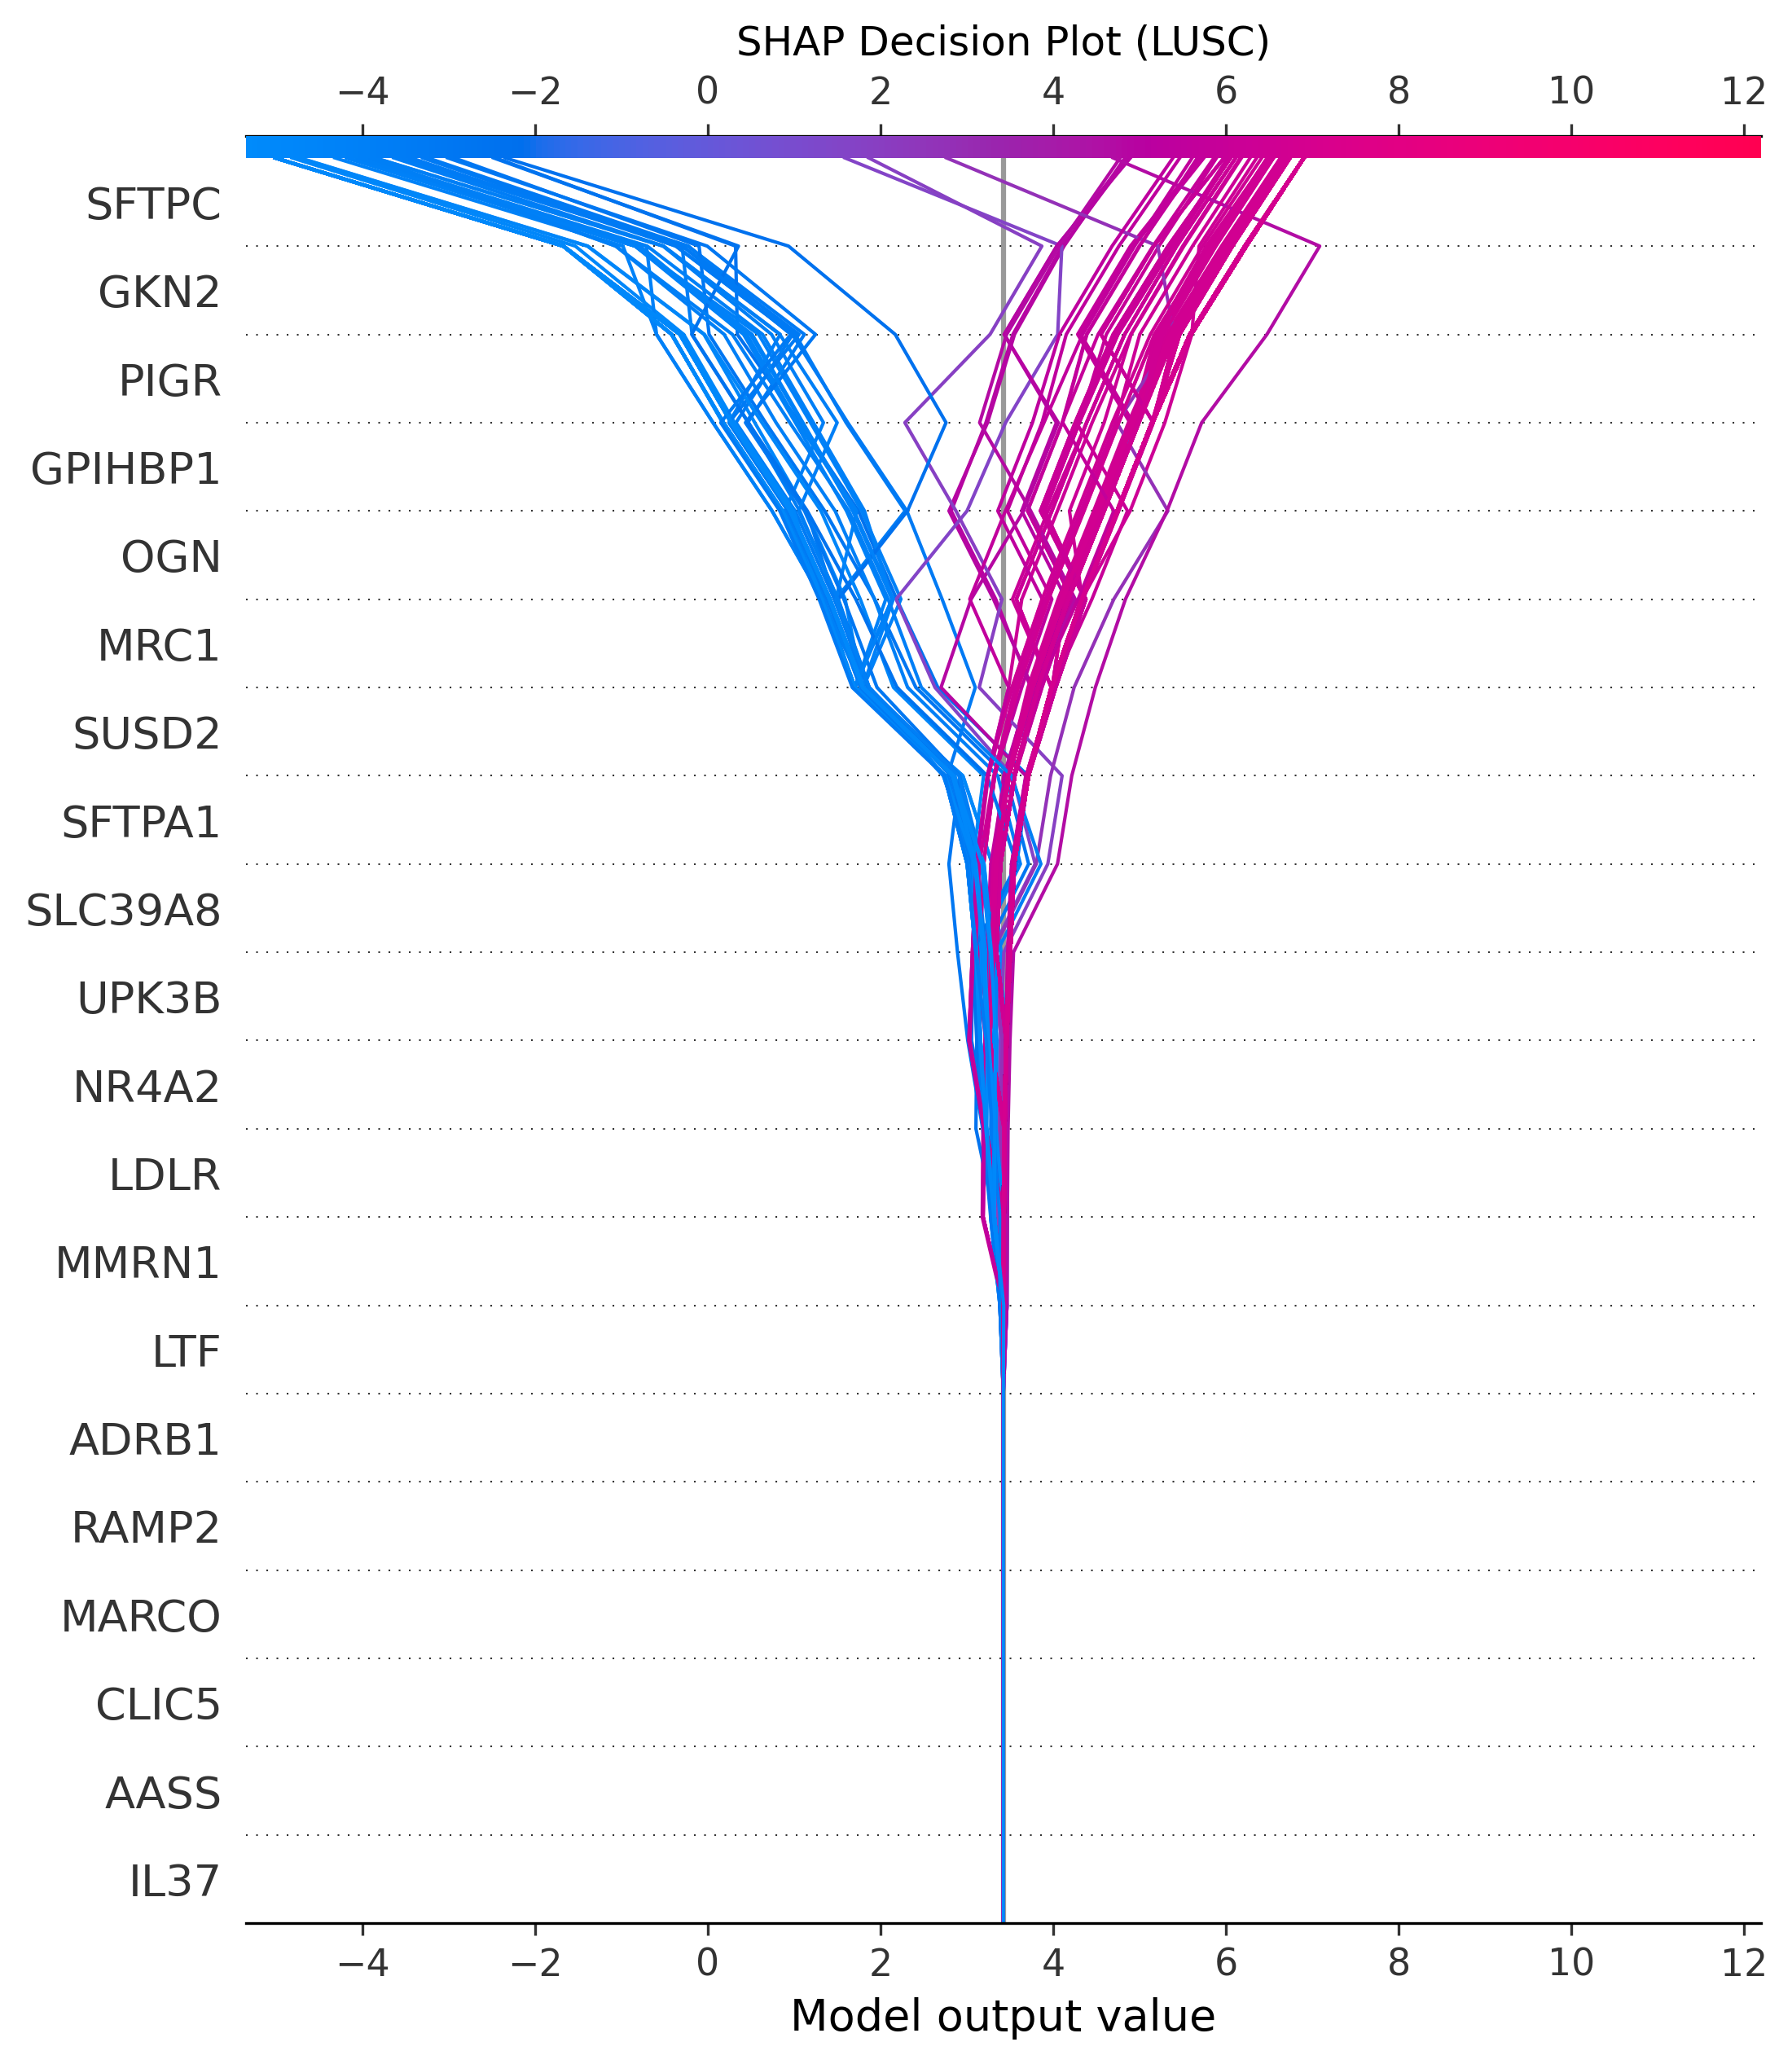

In [20]:
plt.figure(dpi=300)
plt.title("SHAP Decision Plot (LUSC)")
shap.decision_plot(explainer.expected_value, shap_values, X_filtered)
plt.show()

In [21]:
choosen_instance = X_filtered.loc[[67]]
choosen_instance

,SELE,AASS,LTF,MARCO,ADRB1,SUSD2,OGN,CLIC5,SFTPA1,IL37,...,SFTPC,DES,CCL13,GKN2,EMP2,IGHJ5,UPK3B,MRC1,GPIHBP1,TRBJ1-6
67,5.5589,4.414,97.1698,31.5558,1.1879,39.9057,8.9137,4.5457,1006.2686,0.0,...,259.3013,8.5185,14.0257,2.5451,44.5065,95.5035,25.1522,34.7492,2.6066,5.0455


In [22]:
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)